In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\Insurence project\full_data\data_synthetic.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,84966,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,policy5,04-10-2018,08-01-2023,12-03-2023,5,Phone,policy2,366603,2749,1604,Group,Email,In-Person Meeting,Afternoon,English,1,3,728,DUI,Job Change,Segment5
1,95568,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,policy5,11-06-2018,09-06-2020,06-09-2023,0,Chat,policy1,780236,1966,1445,Group,Mail,In-Person Meeting,Morning,French,1,2,792,Clean,Retirement,Segment5
2,10544,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,policy5,06-05-2021,09-03-2023,11-03-2024,4,Email,policy3,773926,4413,1612,Group,Email,Mail,Evening,German,2,1,719,Accident,Childbirth,Segment3
3,77033,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,policy5,09-02-2018,4/14/2018,05-04-2023,5,Chat,policy2,787815,4342,1817,Family,Text,In-Person Meeting,Anytime,French,3,0,639,DUI,Job Change,Segment3
4,88160,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,policy1,09-10-2018,12-02-2022,09-10-2023,3,Chat,policy4,366506,1276,133,Family,Email,Text,Weekends,English,0,3,720,Major Violations,Childbirth,Segment2


In [4]:
df.shape

(53503, 30)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Occupation',
       'Income Level', 'Education Level', 'Geographic Information', 'Location',
       'Behavioral Data', 'Purchase History', 'Policy Start Date',
       'Policy Renewal Date', 'Claim History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Deductible', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Risk Profile',
       'Previous Claims History', 'Credit Score', 'Driving Record',
       'Life Events', 'Segmentation Group'],
      dtype='object')

In [6]:
# Drop unnecessary columns
df.drop(columns=['Customer ID', 'Policy Start Date', 'Policy Renewal Date','Segmentation Group','Purchase History'], axis =1, inplace = True)

In [7]:
df.isnull().sum()

Age                                   0
Gender                                0
Marital Status                        0
Occupation                            0
Income Level                          0
Education Level                       0
Geographic Information                0
Location                              0
Behavioral Data                       0
Claim History                         0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Deductible                            0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Risk Profile                          0
Previous Claims History               0
Credit Score                          0
Driving Record                        0
Life Events                           0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dtypes

Age                                    int64
Gender                                object
Marital Status                        object
Occupation                            object
Income Level                           int64
Education Level                       object
Geographic Information                object
Location                               int64
Behavioral Data                       object
Claim History                          int64
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Deductible                             int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Risk Profile                           int64
Previous Claims History                int64
Credit Sco

In [10]:
df.head()

,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events
0,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,policy5,5,Phone,policy2,366603,2749,1604,Group,Email,In-Person Meeting,Afternoon,English,1,3,728,DUI,Job Change
1,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,policy5,0,Chat,policy1,780236,1966,1445,Group,Mail,In-Person Meeting,Morning,French,1,2,792,Clean,Retirement
2,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,policy5,4,Email,policy3,773926,4413,1612,Group,Email,Mail,Evening,German,2,1,719,Accident,Childbirth
3,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,policy5,5,Chat,policy2,787815,4342,1817,Family,Text,In-Person Meeting,Anytime,French,3,0,639,DUI,Job Change
4,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,policy1,3,Chat,policy4,366506,1276,133,Family,Email,Text,Weekends,English,0,3,720,Major Violations,Childbirth


In [11]:
df2 =df.copy()

# EDA

In [12]:
categorical_EDA = ['Gender', 'Marital Status', 'Occupation','Policy Type', 'Education Level', 'Geographic Information',
                   'Behavioral Data','Interactions with Customer Service','Insurance Products Owned','Risk Profile',
                   'Policy Type','Customer Preferences','Preferred Communication Channel','Preferred Contact Time',
                   'Preferred Language','Driving Record','Life Events']

for variable in categorical_EDA:
    print(df2[variable].value_counts())
    print("~"*50)

Gender
Male      27499
Female    26004
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Marital Status
Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Occupation
Salesperson     7919
Entrepreneur    6636
Teacher         5906
Manager         5803
Lawyer          5775
Engineer        5704
Artist          5666
Doctor          5573
Nurse           4521
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Policy Type
Group         18255
Business      13986
Family        12424
Individual     8838
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Education Level
Associate Degree       12213
Doctorate              12103
High School Diploma    10607
Master's Degree         9366
Bachelor's Degree       9214
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Geographic In

In [13]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [16]:
Numerical_EDA = ['Age','Income Level','Credit Score','Previous Claims History','Premium Amount',
                 'Coverage Amount' ,'Deductible']

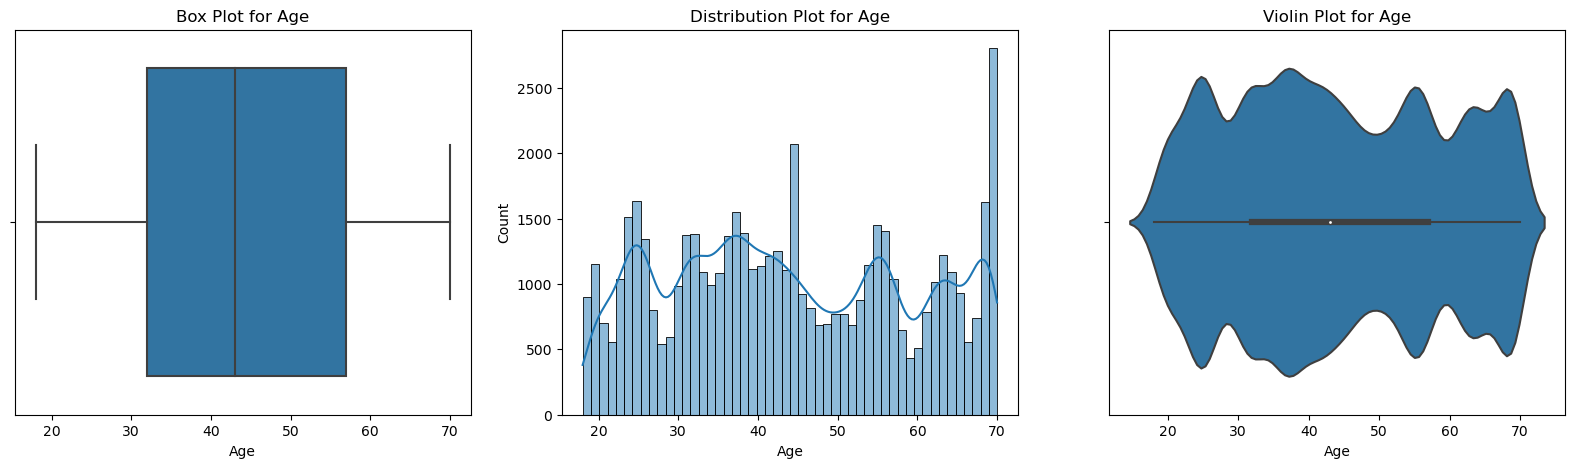

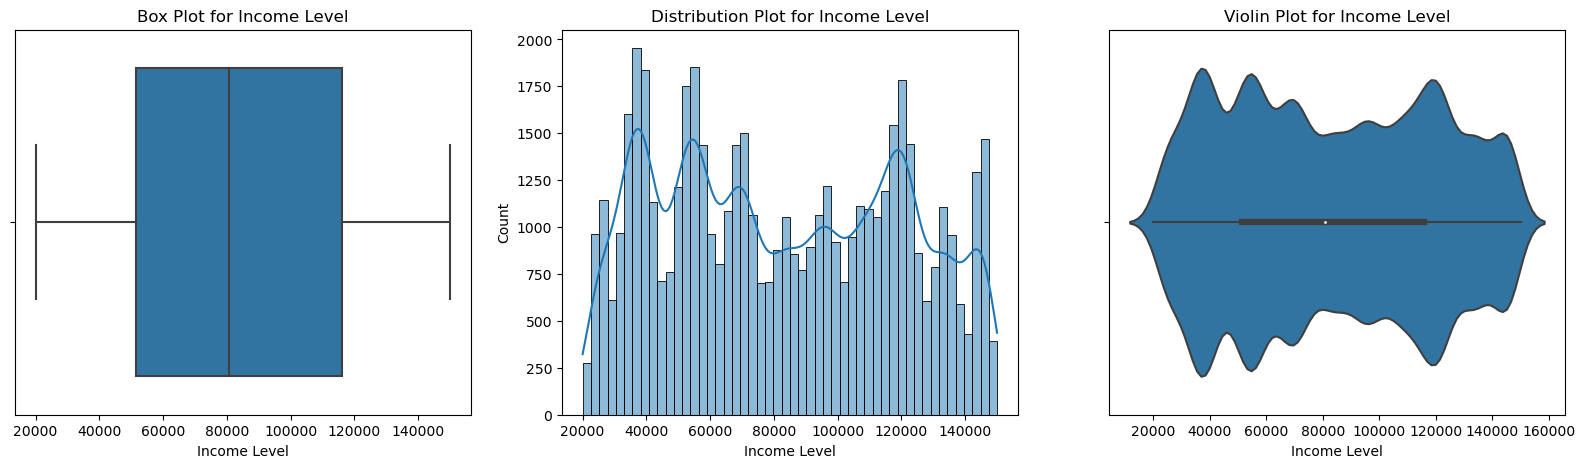

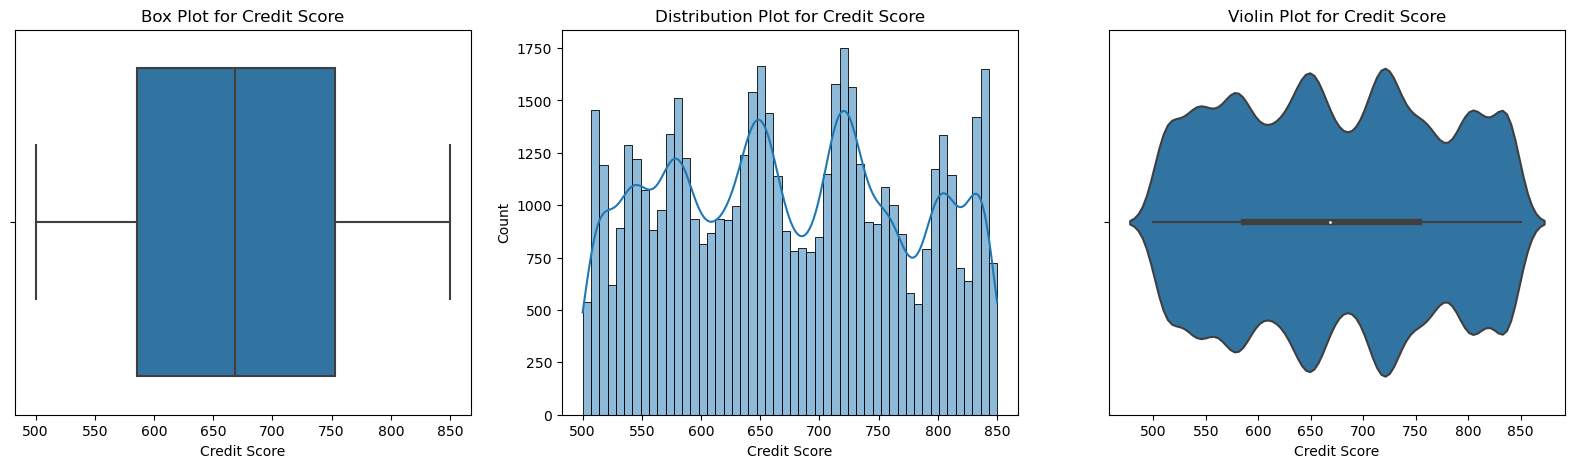

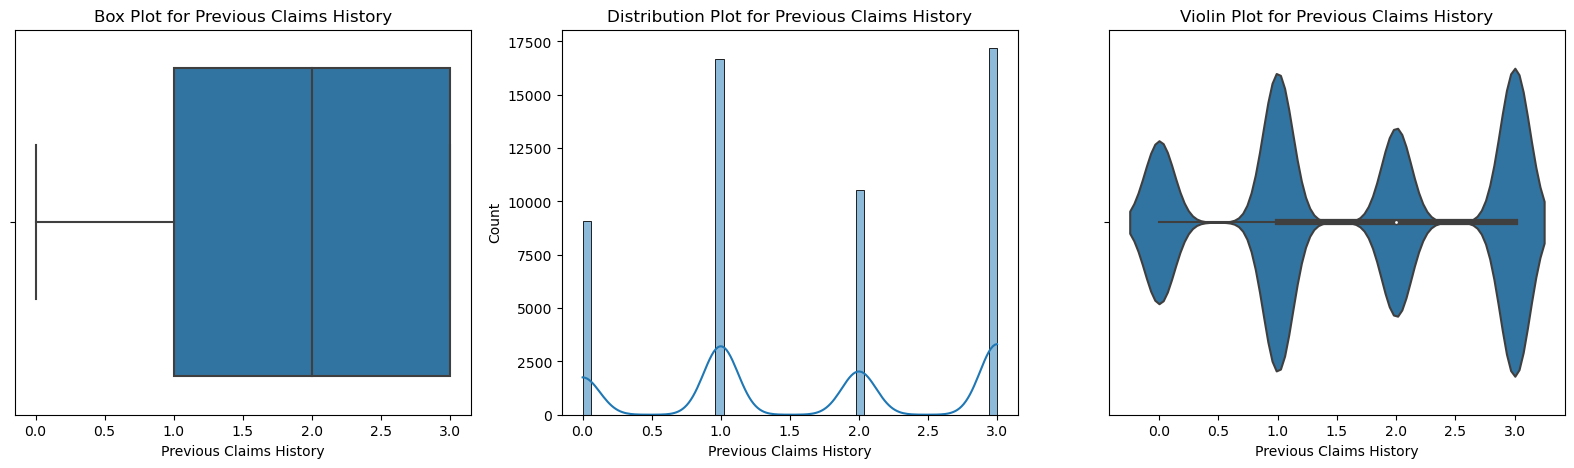

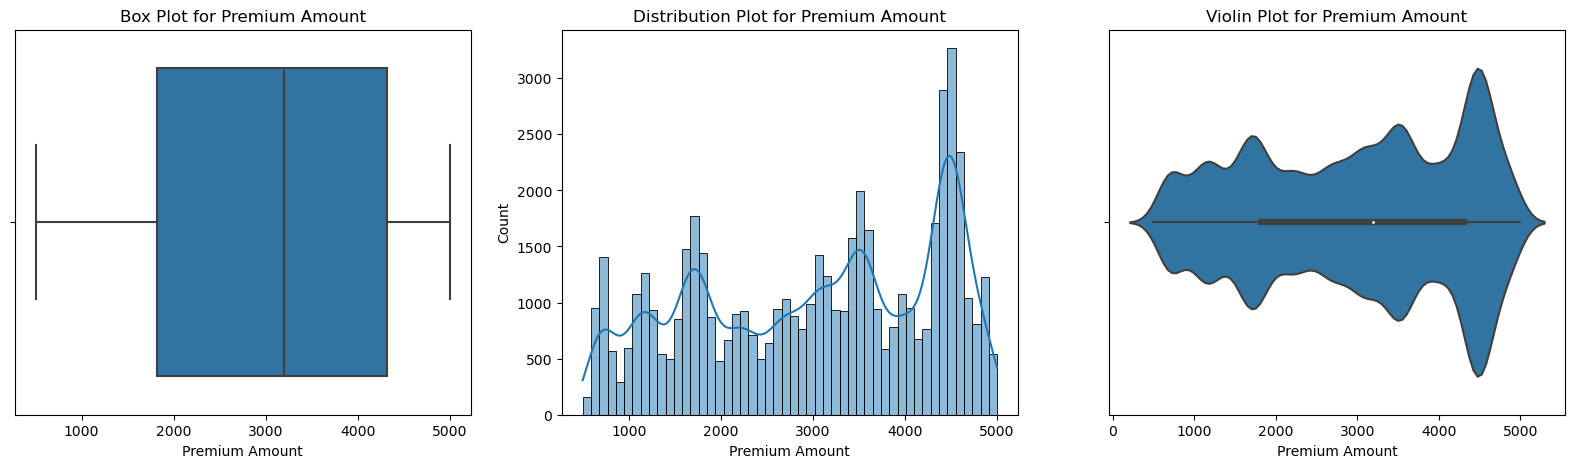

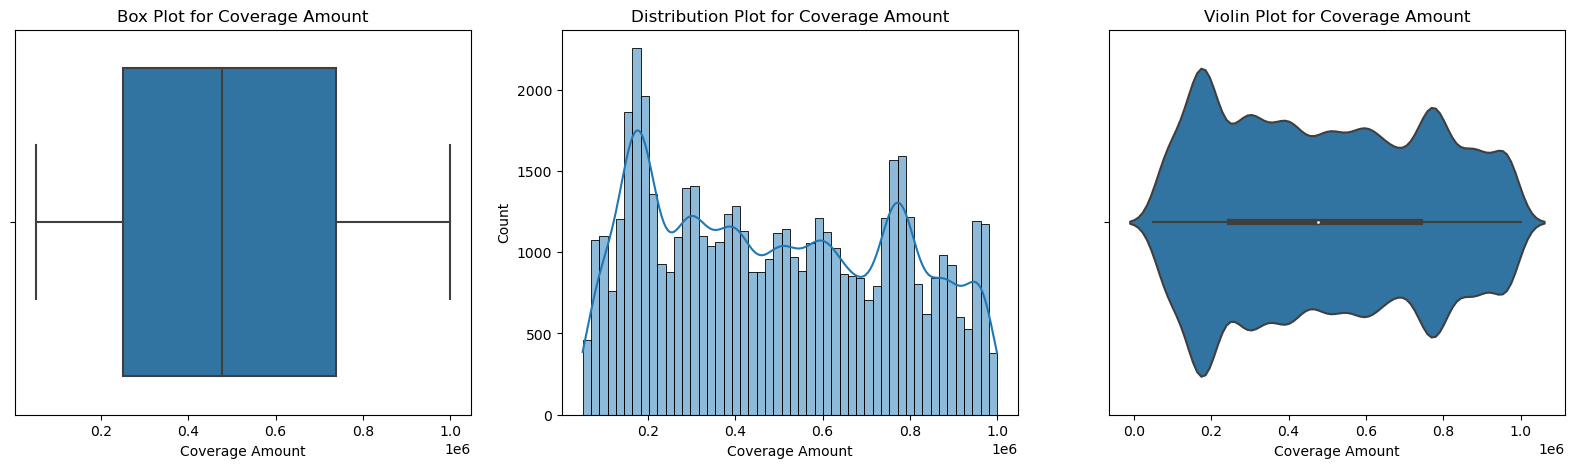

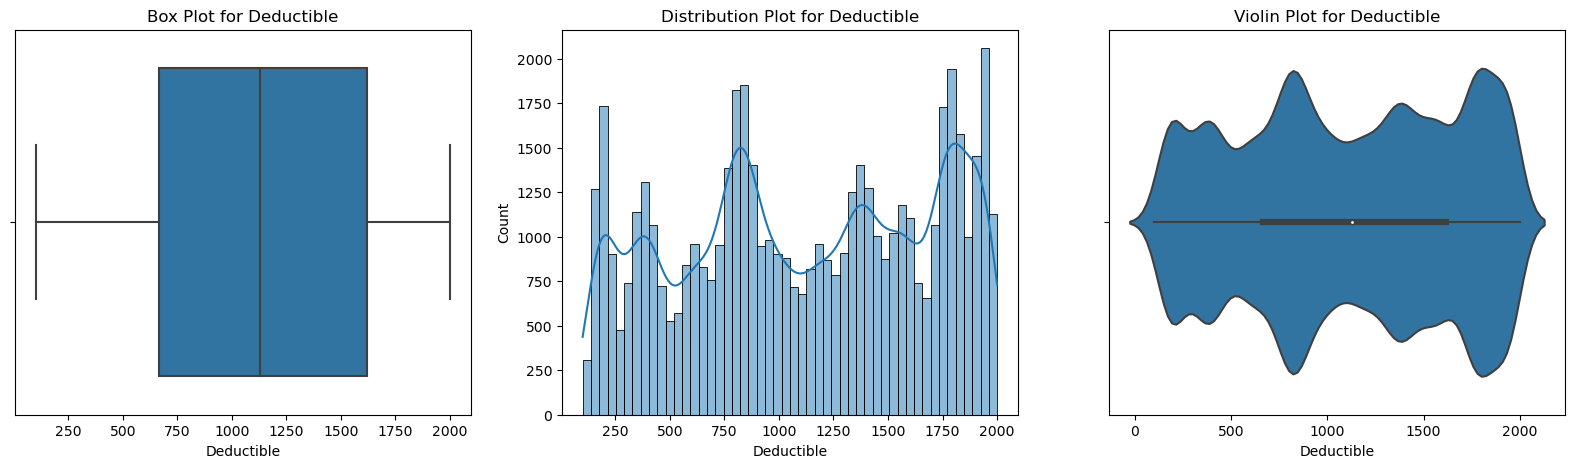

In [17]:
for i in Numerical_EDA:
 plot(df2, i)

# Encoding and Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# Splitting the subset data into train and test sets
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)

# Label Encoding for categorical features
categorical_columns = ['Gender', 'Marital Status', 'Occupation','Policy Type', 'Education Level', 'Geographic Information',
                   'Behavioral Data','Interactions with Customer Service','Insurance Products Owned','Risk Profile',
                   'Policy Type','Customer Preferences','Preferred Communication Channel','Preferred Contact Time',
                   'Preferred Language','Driving Record','Life Events']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

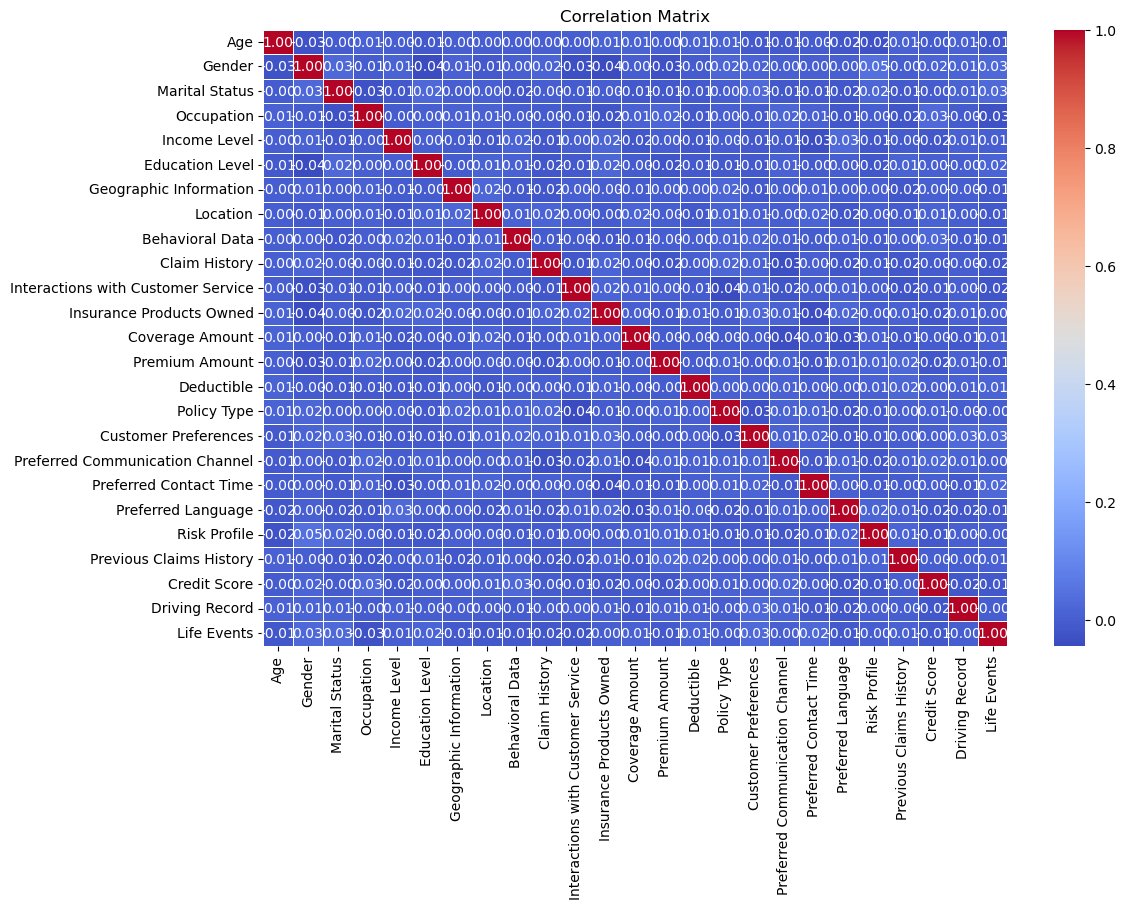

In [20]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Standard Scaling for numerical features
numerical_columns = ['Age','Income Level','Credit Score','Previous Claims History','Premium Amount',
                 'Coverage Amount' ,'Deductible']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Model Training 

In [23]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def evaluate_clusters(model, data, labels):
    cluster_labels = model.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.4f}')

    if data.shape[1] == 2:
        # 2D Scatter Plot
        plt.figure(figsize=(10, 8))
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
        plt.title('Clustering Visualization (2D)')
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
        plt.colorbar(label='Cluster')
        plt.show()
    elif data.shape[1] == 3:
        # 3D Scatter Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=labels, cmap='viridis')
        ax.set_title('Clustering Visualization (3D)')
        ax.set_xlabel(data.columns[0])
        ax.set_ylabel(data.columns[1])
        ax.set_zlabel(data.columns[2])
        plt.show()
    else:
        print("More than 3 features, visualization not supported.")



C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\clust

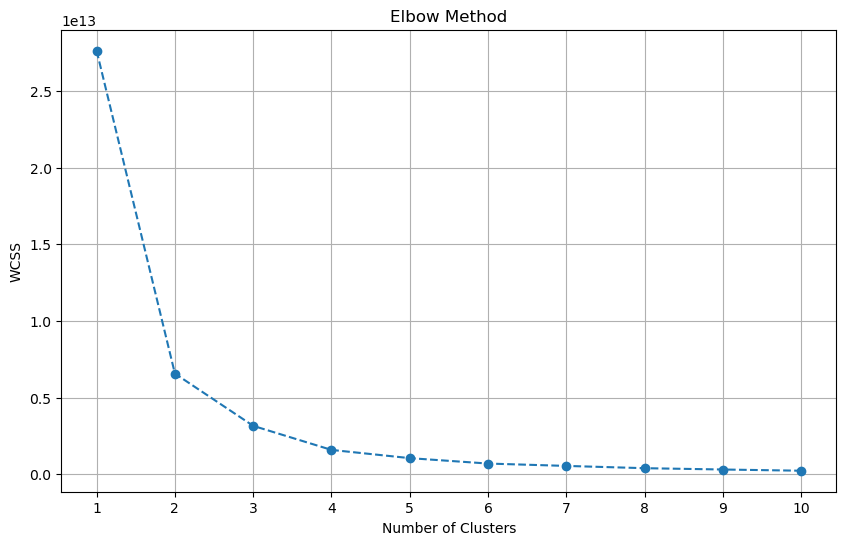

In [24]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [25]:


# Initialize K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to training data
kmeans.fit(X_train)

# Predict clusters on training data
train_clusters_kmeans = kmeans.predict(X_train)

# Evaluate the K-Means clustering
print("K-Means Clustering:")
evaluate_clusters(kmeans, X_train, train_clusters_kmeans)

# Predict clusters on test data
test_clusters_kmeans = kmeans.predict(X_test)


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering:
Silhouette Score: 0.6438
More than 3 features, visualization not supported.


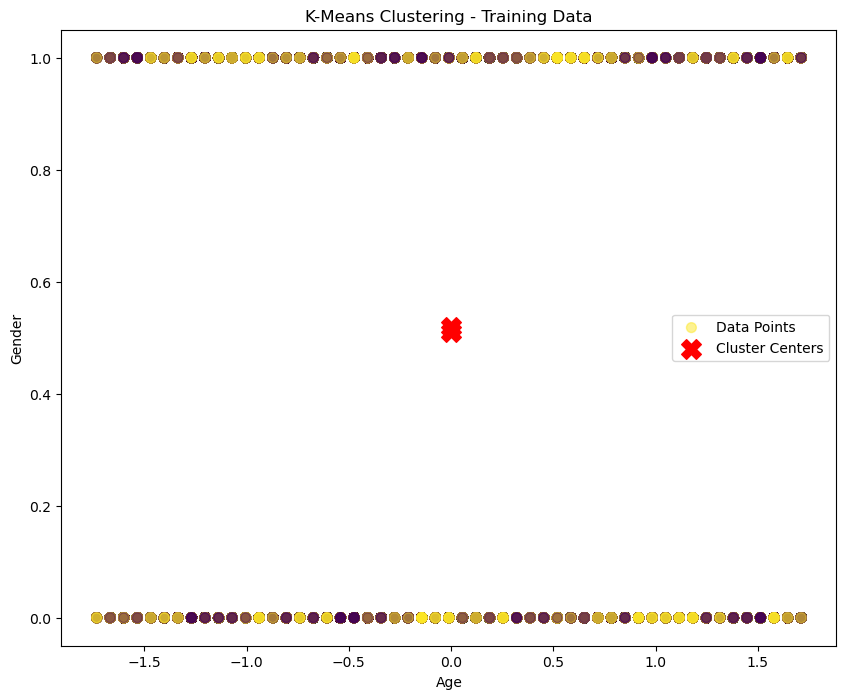

In [26]:
import matplotlib.pyplot as plt

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Plotting the clusters for training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters_kmeans, cmap='viridis', s=50, alpha=0.5, label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering - Training Data')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend()
plt.show()
